### Assignment2

###### Name: Xiaomeng Dong
###### Netid: xd515

## 1. Read data

In [12]:
from __future__ import division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd
import math
import statsmodels.formula.api as smf

import json
import os

#s = json.load( open(os.getenv('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [14]:
race_keys = {"all": 1, "white": 4, "black": 6, "asian": 8, "hispanic": 9}

allmales = {}; allfemales = {};
for race, i in race_keys.items():
    allmales[race] = pd.read_excel(io = url + "pinc08_2_1_%i.xls" %i, skiprows = 9)
    allfemales[race] = pd.read_excel(io = url + "pinc08_3_1_%i.xls" %i, skiprows = 9)

In [15]:
allfemales["all"].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [16]:
allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

### Descriptive phase

In [17]:
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

('#####', 'hispanic')
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               Na

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2120.260870            292.304348        141.021739   
std          3673.947011            563.958859        181.001595   
min             0.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14346.000000           2727.000000        679.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         140.934783        229.456522          179.021739   
std          203.026917        371.274843          321.057730   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN                 NaN 

## 2. Exploratory phase

In [23]:
for gender in [allmales, allfemales]:
    for k in gender:
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


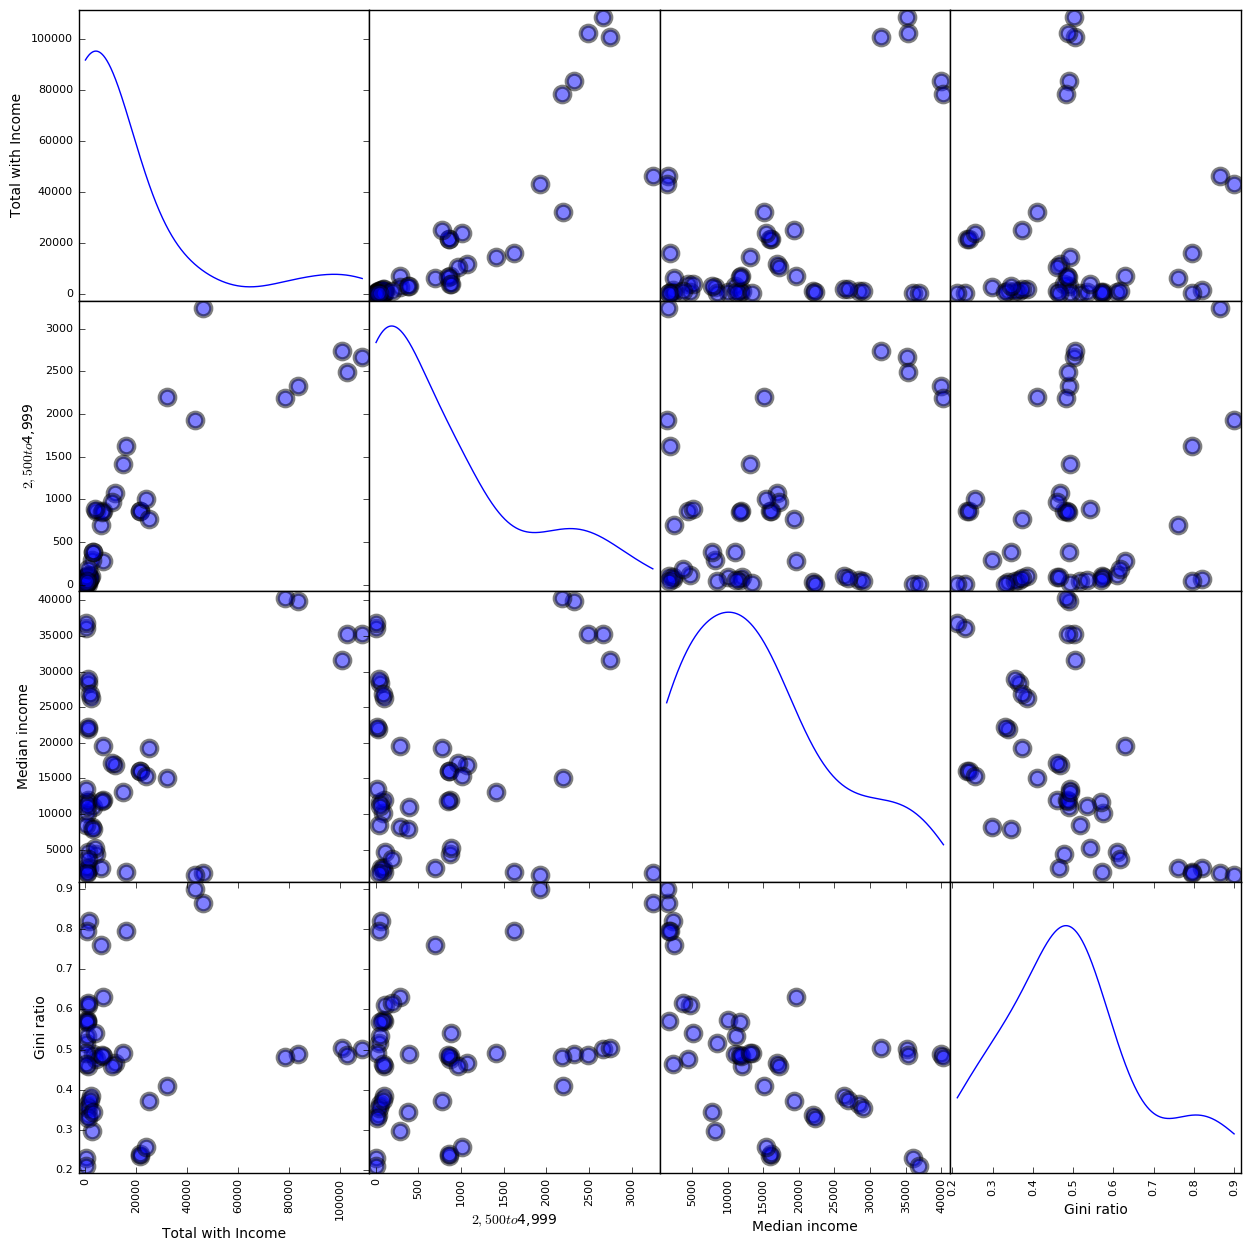

In [24]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income', u'$2,500 to $4,999',
                     u'Median income', u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  
plt.show()

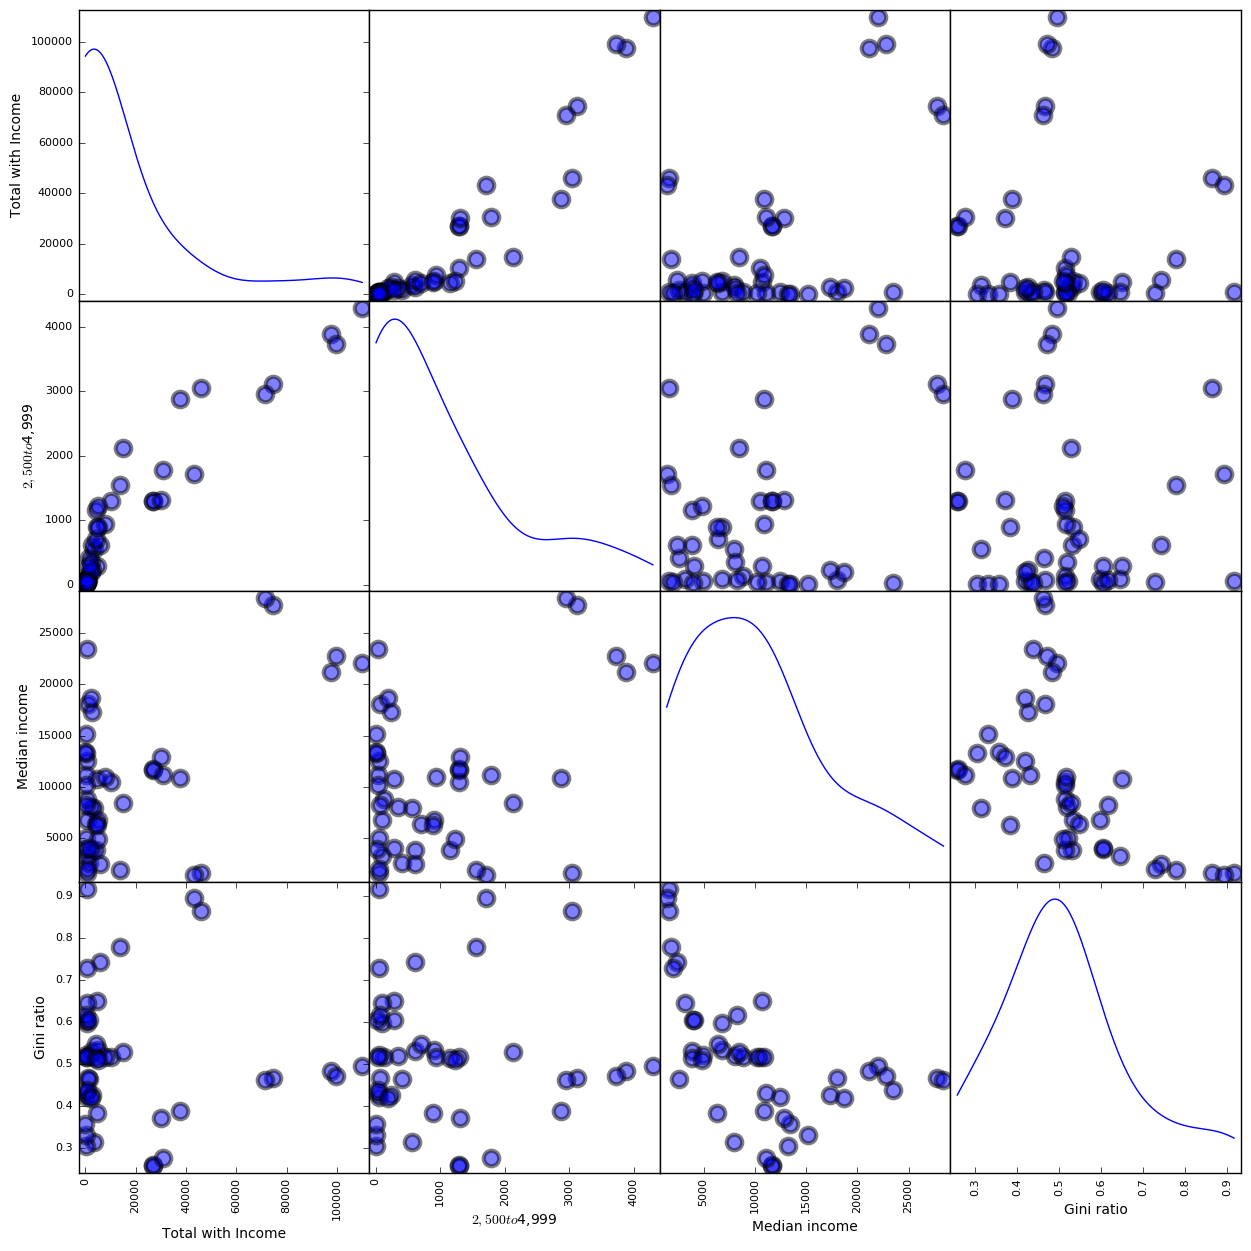

In [25]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income', u'$2,500 to $4,999',
                     u'Median income', u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  
plt.show()

In [22]:
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

## 3. Visuallization

In [52]:
income = pd.DataFrame(columns=['males','females'], index=['hispanic','all','black','white','asian'])

In [53]:
for k in allfemales:
    income["males"][k] = allmales[k]["Median income"][1]
    income["females"][k] = allfemales[k]["Median income"][1]

males = np.array(list(income["males"]))
females = np.array(list(income["females"]))

In [54]:
def linear(x, a, b):
    return a+b*x

In [55]:
params = np.polyfit(males, females, 1)

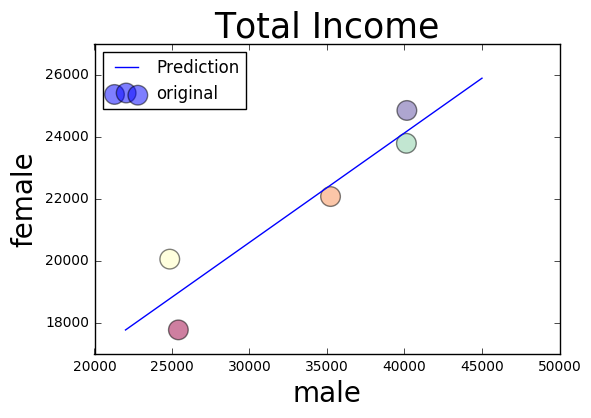

In [56]:
pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label='original') 
x=np.arange(22000,45000)
pl.plot(x,linear(x,params[1],params[0]), label='Prediction')
pl.xlabel("male", fontsize=20)
pl.ylabel("female", fontsize=20)
pl.title("Total Income", fontsize=25)
pl.legend(loc='best')

In [57]:
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

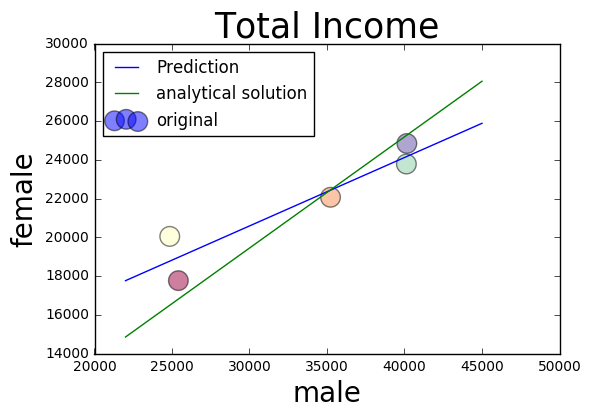

In [58]:
pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label='original') 
x=np.arange(22000,45000)
pl.plot(x,linear(x,params[1],params[0]), label='Prediction')
pl.plot(x,linear(x,beta0,beta1), label='analytical solution')
pl.xlabel("male", fontsize=20)
pl.ylabel("female", fontsize=20)
pl.title("Total Income", fontsize=25)
pl.legend(loc='best')

In [59]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())
mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))

In [60]:
params_all = np.polyfit(all_males_allincomes[mask],all_females_allincomes[mask],1)
cor = stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta1_all = cor[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta0_all = all_females_allincomes[mask].mean() - beta1 * all_males_allincomes[mask].mean()

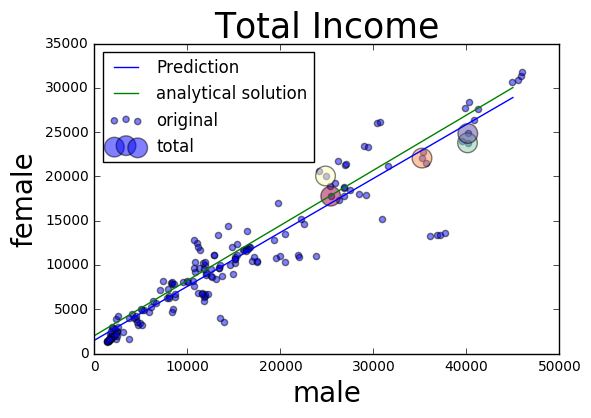

In [61]:
pl.scatter(all_males_allincomes[mask], all_females_allincomes[mask], s=20, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label='original') 
pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label="total") 
x=np.arange(0,45000)
pl.plot(x,linear(x,params_all[1],params_all[0]), label='Prediction')
pl.plot(x,linear(x,beta0_all,beta1_all), label='analytical solution')
pl.xlabel("male", fontsize=20)
pl.ylabel("female", fontsize=20)
pl.title("Total Income", fontsize=25)
pl.xlim(left=0)
pl.ylim(bottom=0)
pl.legend(loc='best')

## 4. Prediction

In [62]:
male_pay = 100000
female_pay = linear(male_pay, params_all[1], params_all[0])
print "female pay by fit function: {}".format(female_pay)
fe_pay = linear(male_pay,beta0_all, beta1_all)
print "female pay by analytical solution: {}".format(fe_pay)

female pay by fit function: 62395.0918029
female pay by analytical solution: 64252.0555874


In [63]:
income

,males,females
hispanic,25411,17762
all,35228,22063
black,24855,20044
white,40122,23780
asian,40153,24840


#### Overall there is a big difference between the incomes of males and females. The average difference is more than 10,000. 